In [46]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [20]:
data = pd.read_csv("WELFake_Dataset.csv")

In [21]:
data.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [23]:
y = data.label
print(f'Ratio of real and fake news in the dataset:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news in the dataset:


real    0.514404
fake    0.485596
Name: label, dtype: float64

In [24]:
# removing unnamed column from the dataset 
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [25]:
#cleaning missing values
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [26]:
data = data.fillna('')

In [27]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [10]:
#checking diversity in content
data.nunique()

title    28021
text     27980
label        3
dtype: int64

In [28]:
#combining title column and text column into one
data["title_text"] = data["title"] + data["text"]

In [29]:
data.head()

,title,text,label,title_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


In [30]:
data["body_len"] = data["title_text"].apply(lambda x: len(x) - x.count(" "))

In [31]:
#Analyzing data using body_len
fake_stats = data[data["label"] == 1]["body_len"].describe()

real_stats = data[data["label"] == 0]["body_len"].describe()

print("Fake News Body Length Statistics:")
print(fake_stats)
print("\nReal News Body Length Statistics:")
print(real_stats)

Fake News Body Length Statistics:
count     37106.000000
mean       2613.357462
std        3390.379607
min           1.000000
25%        1164.000000
50%        1906.000000
75%        2923.000000
max      122556.000000
Name: body_len, dtype: float64

Real News Body Length Statistics:
count    35028.000000
mean      2965.568431
std       2754.116507
min         27.000000
25%       1288.000000
50%       2264.000000
75%       4021.000000
max      70714.000000
Name: body_len, dtype: float64


In [32]:
#In this dataset  fake news articles tend to have a slightly lower average body length but a higher variability compared to real news articles.

In [33]:
# Spliting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.33, random_state=53)

In [34]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# NAIVE BAYES

In [36]:
# Instantiate a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)


MultinomialNB()

In [37]:
# Create the predicted tags for both training and testing sets
pred_train = nb_classifier.predict(tfidf_train)
pred_test = nb_classifier.predict(tfidf_test)

In [40]:
# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, pred_train)
print(f"Training Accuracy: {accuracy_train}")

# Calculate accuracy for testing set
accuracy_test = accuracy_score(y_test, pred_test)
print(f"Testing Accuracy: {accuracy_test}")

Training Accuracy: 0.8848310538186183
Testing Accuracy: 0.8643982356647764


In [41]:
# Calculate precision for testing set
precision_test = precision_score(y_test, pred_test, average='weighted')
print(f"Precision: {precision_test}")

# Calculate recall for testing set
recall_test = recall_score(y_test, pred_test, average='weighted')
print(f"Recall: {recall_test}")

Precision: 0.8644725485115662
Recall: 0.8643982356647764


In [44]:
f1 = f1_score(y_test, pred_test, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.8644103989320865


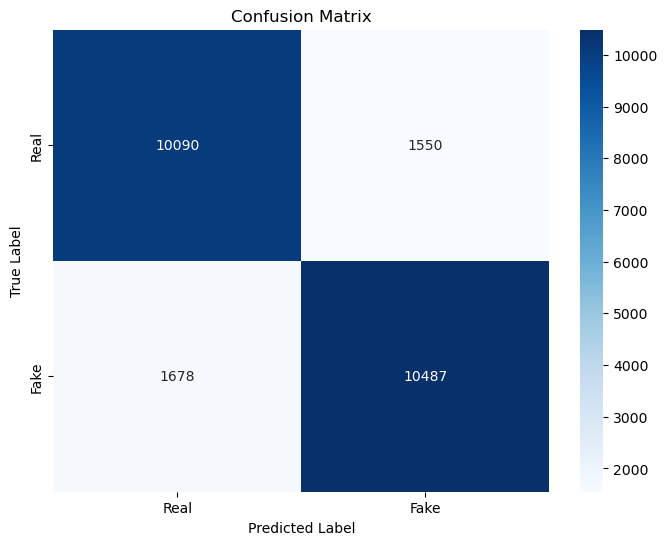

In [47]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, pred_test)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# RANDOM FOREST

In [49]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(tfidf_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
# Predict on the testing set
pred_test_rfc = RFC.predict(tfidf_test)

# Predict on the training set
pred_train_rfc = RFC.predict(tfidf_train)

In [51]:
# Calculate accuracy for training set
accuracy_train_rfc = accuracy_score(y_train, pred_train_rfc)
print(f"Training Accuracy: {accuracy_train_rfc}")

# Calculate accuracy for testing set
accuracy_test_rfc = accuracy_score(y_test, pred_test_rfc)
print(f"Testing Accuracy: {accuracy_test_rfc}")

Training Accuracy: 0.9999586169794533
Testing Accuracy: 0.9266960722537282


In [52]:
# Calculate precision for testing set
precision_rfc = precision_score(y_test, pred_test_rfc, average='weighted')
print(f"Precision: {precision_rfc}")

# Calculate recall for testing set
recall_rfc = recall_score(y_test, pred_test_rfc, average='weighted')
print(f"Testing Recall: {recall_rfc}")

# Calculate F1 score for testing set
f1_rfc = f1_score(y_test, pred_test_rfc, average='weighted')
print(f"Testing F1 Score: {f1_rfc}")

Precision: 0.9267741376360052
Testing Recall: 0.9266960722537282
Testing F1 Score: 0.9266790660468289


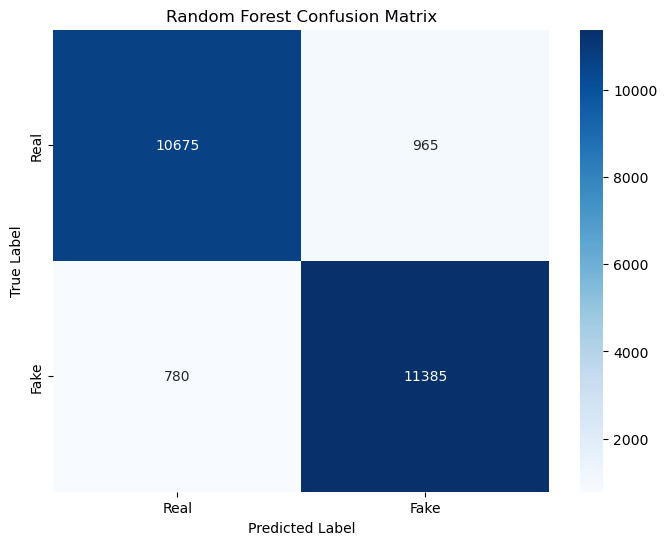

In [53]:
# Confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, pred_test_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# GRADIENT BOOSTER 

In [54]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(tfidf_train, y_train)

GradientBoostingClassifier(random_state=0)

In [55]:
# Predict on the testing set
pred_test_gbc = GBC.predict(tfidf_test)

# Predict on the training set
pred_train_gbc = GBC.predict(tfidf_train)

In [59]:
# Calculate accuracy for training set
accuracy_train_gbc = accuracy_score(y_train, pred_train_gbc)
print(f"Training Accuracy: {accuracy_train_gbc}")

# Calculate accuracy for testing set
accuracy_test_gbc = accuracy_score(y_test, pred_test_gbc)
print(f"Testing Accuracy: {accuracy_test_gbc}")

Training Accuracy: 0.9250760413002546
Testing Accuracy: 0.9214870825456837


In [60]:
# Calculate precision for testing set
precision_gbc = precision_score(y_test, pred_test_gbc, average='weighted')
print(f"Precision: {precision_gbc}")

# Calculate recall for testing set
recall_gbc = recall_score(y_test, pred_test_gbc, average='weighted')
print(f"Recall: {recall_gbc}")

# Calculate F1 score for testing set
f1_gbc = f1_score(y_test, pred_test_gbc, average='weighted')
print(f"F1 Score: {f1_gbc}")

Precision: 0.9230065866544288
Recall: 0.9214870825456837
F1 Score: 0.9213578553600195


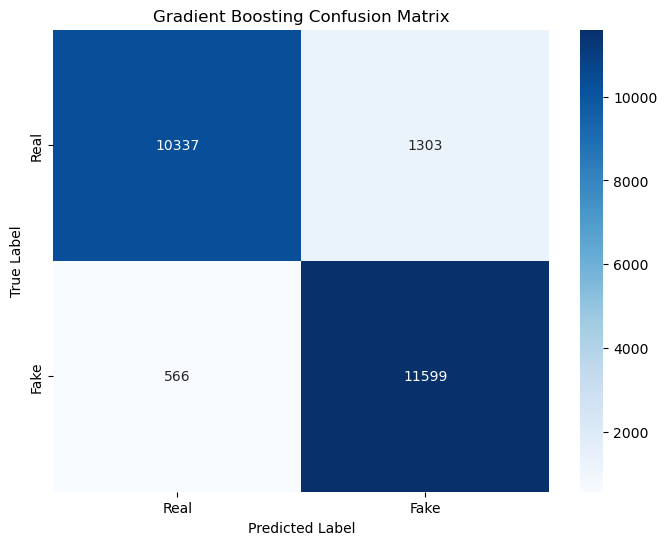

In [61]:
# Confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, pred_test_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM

In [62]:
# Create and train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(tfidf_train, y_train)

SVC(kernel='linear')

In [64]:
# Predict on the training set
pred_train_svm = svm_model.predict(tfidf_train)

# Predict on the testing set
pred_test_svm = svm_model.predict(tfidf_test)

In [65]:
# Calculate accuracy for training set
accuracy_train_svm = accuracy_score(y_train, pred_train_svm)
print(f"Training Accuracy: {accuracy_train_svm}")

# Calculate accuracy for testing set
accuracy_test_svm = accuracy_score(y_test, pred_test_svm)
print(f"Testing Accuracy: {accuracy_test_svm}")

Training Accuracy: 0.982950195534772
Testing Accuracy: 0.9548834278512918


In [66]:
# Calculate precision for testing set
precision_svm = precision_score(y_test, pred_test_svm, average='weighted')
print(f"Precision: {precision_svm}")

# Calculate recall for testing set
recall_svm = recall_score(y_test, pred_test_svm, average='weighted')
print(f"Recall: {recall_svm}")

# Calculate F1 score for testing set
f1_svm = f1_score(y_test, pred_test_svm, average='weighted')
print(f"F1 Score: {f1_svm}")

Precision: 0.9549504595850947
Recall: 0.9548834278512918
F1 Score: 0.9548748291042558


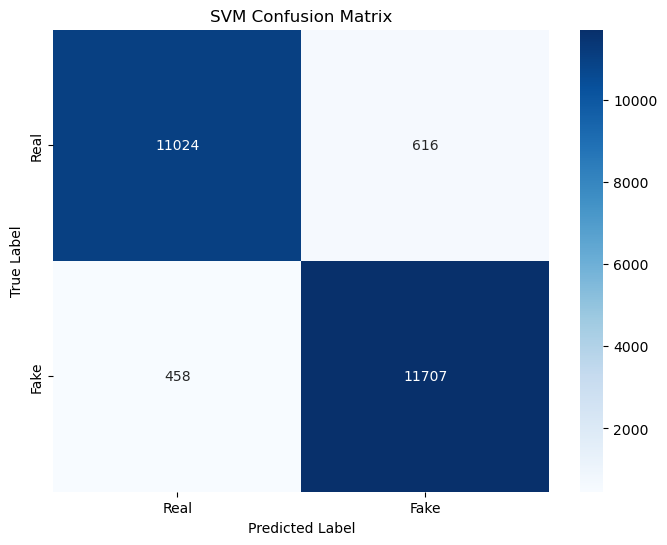

In [67]:
# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, pred_test_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC CURVE

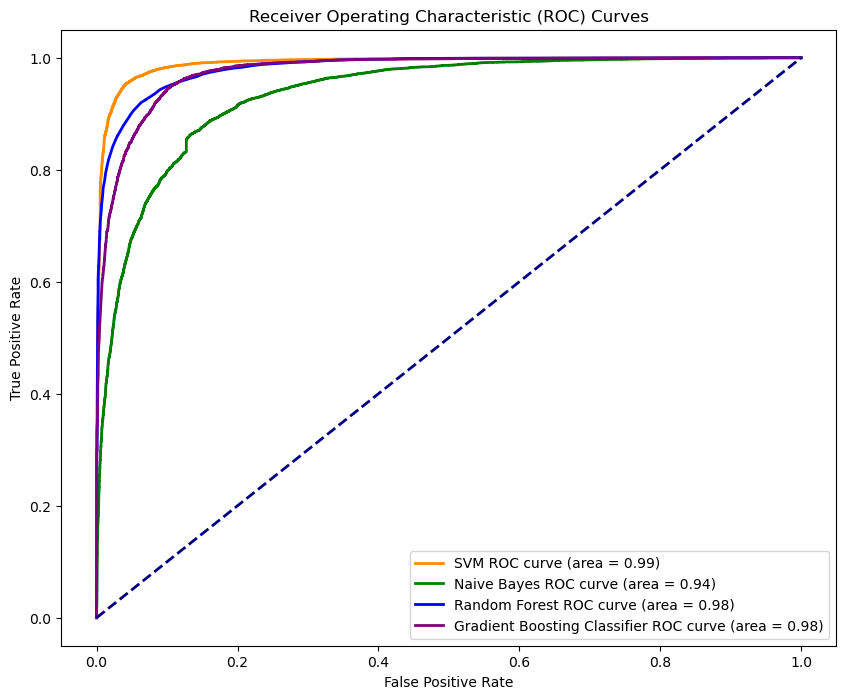

In [69]:
# Get predicted probabilities for the positive class
y_pred_prob_svm = svm_model.decision_function(tfidf_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Get predicted probabilities for the positive class
y_pred_prob_nb = nb_classifier.predict_proba(tfidf_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Get predicted probabilities for the positive class
y_pred_prob_rfc = RFC.predict_proba(tfidf_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Get predicted probabilities for the positive class
y_pred_prob_gbc = GBC.predict_proba(tfidf_test)[:, 1]
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_prob_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Plot ROC curves in a single graph
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='purple', lw=2, label=f'Gradient Boosting Classifier ROC curve (area = {roc_auc_gbc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()